# Face recognition

In [8]:
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,ZeroPadding2D,Dropout,Softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.keras import Sequential
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_lfw_pairs
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import numpy as np
import random

# Commented out IPython magic to ensure Python compatibility.
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_datasets as tfds
import tensorflow as tf
tf.test.gpu_device_name()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


''

## Fetch Data (FUNNELED FALSE)

In [ ]:
data=fetch_lfw_people(resize=0.4,min_faces_per_person=40,funneled=False)

In [ ]:
l=list(data.keys())
print(l)

['data', 'images', 'target', 'target_names', 'DESCR']


In [ ]:
X=data["data"]
Y=data["target"]
images=data["images"]
target_name=data["target_names"]

In [ ]:
np.unique(Y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 77,  42, 236, 121, 530, 109,  44,  71,  52,  55,  42,  53,  60,
         41,  41,  48,  52, 144,  49]))

In [ ]:
np.unique(target_name,return_counts=True)

(array(['Ariel Sharon', 'Arnold Schwarzenegger', 'Colin Powell',
        'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
        'Gloria Macapagal Arroyo', 'Hugo Chavez', 'Jacques Chirac',
        'Jean Chretien', 'Jennifer Capriati', 'John Ashcroft',
        'Junichiro Koizumi', 'Laura Bush', 'Lleyton Hewitt',
        'Luiz Inacio Lula da Silva', 'Serena Williams', 'Tony Blair',
        'Vladimir Putin'], dtype='<U25'),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

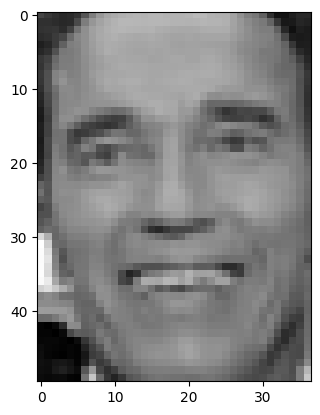

In [ ]:
target=list(target_name).index("Arnold Schwarzenegger")
indexes=np.where(Y == target)
plt.imshow(images[indexes[0][0],:,:],cmap="gray")

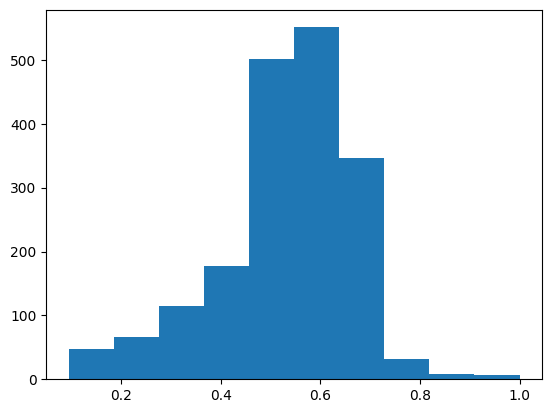

In [ ]:
_=plt.hist(images[indexes[0][0],:,:].flatten())

In [ ]:
_,W,H=images.shape
features = X.shape[1]
m = X.shape[0]
classes = target_name.shape[0]

print("Samples:",m)
print("Features:",features)
print("Classes:",classes)
print("Dimension per image:",(W,H))

Samples: 1867
Features: 1850
Classes: 19
Dimension per image: (50, 37)


## Prepare Training

In [ ]:
### Shuffling the data ###

temp=list(zip(X,Y)) 
random.Random(42).shuffle(temp) 
X,Y=zip(*temp)

X=np.array(X)
Y=np.array(Y)

In [ ]:
####### Train and test splitting of data #######

training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
print(training_data_X.shape)
print(training_data_Y.shape)
print(testing_data_X.shape)
print(testing_data_Y.shape)

(1493, 1850)
(1493,)
(374, 1850)
(374,)


## Create Model

In [ ]:
from tensorflow.keras.utils import to_categorical
import time

####### CNN #######
model=Sequential()

model.add(Conv2D(64,kernel_size = 3,activation = 'relu',input_shape = (W,H,1)))
model.add(MaxPooling2D((2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = 3,activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = 5,activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))
model.add(Dropout(0.25))
#model.add(Conv2D(512,kernel_size = 3,activation = 'relu'))
#model.add(MaxPooling2D((2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(classes,activation = 'softmax'))



training_data_Y = to_categorical(training_data_Y)
testing_data_Y = to_categorical(testing_data_Y)
training_data_X = training_data_X.reshape(training_data_X.shape[0],W,H,1)
testing_data_X = testing_data_X.reshape(testing_data_X.shape[0],W,H,1)

print(training_data_X.shape)
print(training_data_Y.shape)
print(testing_data_X.shape)
print(testing_data_Y.shape)

# Measuring the time taken by the model to train
start_time = time.time()
model.compile(optimizer='Adamax',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_data_X,training_data_Y,validation_data = (testing_data_X, testing_data_Y),batch_size = 100,epochs = 50)
end_time = time.time()


print("###### Total Time Taken: ", round((end_time - start_time)/60), 'Minutes ######')

In [ ]:
score = model.evaluate(testing_data_X,testing_data_Y,verbose=0)
print(score[1]*100)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label  ="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Training loss") 
plt.plot(epochs, val_loss, "b", label = "Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Fetch Data (FUNNELED TRUE)

parece que es una técnica de alineamiento de imágenes que mejora el resultado del reconocimiento:
    
    http://vis-www.cs.umass.edu/deep_funnel.html
    
Deberíamos tenerlo en cuenta de cara a tu reconocedor, y si metes imágenes para entrenar tu reconocedor, deberíamos alinearlas de la misma forma que en el dataset LFW.

Sin embargo, al repetir todo el proceso para imágenes FUNNELED, el resultado es mucho peor....

In [31]:
data2=fetch_lfw_people(resize = 0.4,min_faces_per_person=40,funneled=True)

In [32]:
X2=data2["data"]
Y2=data2["target"]
images2=data2["images"]
target_name2=data2["target_names"]

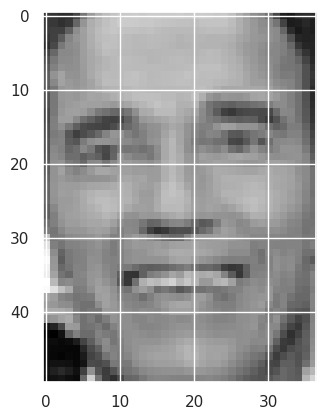

In [33]:
target2=list(target_name2).index("Arnold Schwarzenegger")
indexes2=np.where(Y2 == target2)
plt.imshow(images2[indexes2[0][0],:,:],cmap="gray")

In [34]:
_,W2,H2=images2.shape
features2 = X2.shape[1]
m2 = X2.shape[0]
classes2 = target_name2.shape[0]

print("Samples:",m2)
print("Features:",features2)
print("Classes:",classes2)
print("Dimension per image:",(W2,H2))

Samples: 1867
Features: 1850
Classes: 19
Dimension per image: (50, 37)


## Prepare Training

In [35]:
### Shuffling the data ###

temp2=list(zip(X2,Y2)) 
random.Random(42).shuffle(temp2) 
X2,Y2=zip(*temp2)

X2=np.array(X2)
Y2=np.array(Y2)

####### Train and test splitting of data #######

training_data_X2,remaining_data_X2,training_data_Y2,remaining_data_Y2=train_test_split(X2,Y2,test_size=0.3,random_state=42)
validation_data_X2,testing_data_X2,validation_data_Y2,testing_data_Y2=train_test_split(remaining_data_X2,remaining_data_Y2,test_size=0.5,random_state=42)

In [36]:
print(training_data_X2.shape)
print(training_data_Y2.shape)
print(validation_data_X2.shape)
print(validation_data_Y2.shape)
print(testing_data_X2.shape)
print(testing_data_Y2.shape)

(1306, 1850)
(1306,)
(280, 1850)
(280,)
(281, 1850)
(281,)


## Create Model

In [37]:
from tensorflow.keras.utils import to_categorical
import time

####### CNN #######
model2=Sequential()

model2.add(Conv2D(64,kernel_size = 3,activation = 'relu',input_shape = (W2,H2,1)))
model2.add(MaxPooling2D((2,2),strides = (2,2)))
model2.add(Conv2D(128,kernel_size = 3,activation = 'relu'))
model2.add(MaxPooling2D((2,2),strides = (2,2)))
model2.add(Conv2D(256,kernel_size = 5,activation = 'relu'))
model2.add(MaxPooling2D((2,2),strides = (2,2)))
model2.add(Dropout(0.25))
#model2.add(Conv2D(512,kernel_size = 3,activation = 'relu'))
#model2.add(MaxPooling2D((2,2),strides = (2,2)))
model2.add(Flatten())
model2.add(Dense(classes2,activation = 'softmax'))



training_data_Y2 = to_categorical(training_data_Y2)
validation_data_Y2 = to_categorical(validation_data_Y2)
training_data_X2 = training_data_X2.reshape(training_data_X2.shape[0],W2,H2,1)
validation_data_X2 = validation_data_X2.reshape(validation_data_X2.shape[0],W2,H2,1)

In [27]:
print(training_data_X2.shape)
print(training_data_Y2.shape)
print(validation_data_X2.shape)
print(validation_data_Y2.shape)

(1306, 50, 37, 1)
(1306, 19)
(280, 50, 37, 1)
(280, 19)


In [ ]:
print(validation_data_X2.shape)
print(validation_data_Y2.shape)

In [38]:
# Measuring the time taken by the model to train
start_time2 = time.time()
model2.compile(optimizer='Adamax',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(training_data_X2,training_data_Y2,validation_data = (validation_data_X2, validation_data_Y2),batch_size = 150,epochs = 100)
end_time2 = time.time()


print("###### Total Time Taken: ", round((end_time2 - start_time2)/60), 'Minutes ######')

Epoch 1/100
9/9 [==============================] - 14s 1s/step - loss: 2.6591 - accuracy: 0.2596 - val_loss: 2.5687 - val_accuracy: 0.2750
Epoch 2/100
9/9 [==============================] - 13s 1s/step - loss: 2.5431 - accuracy: 0.2902 - val_loss: 2.5701 - val_accuracy: 0.2750
Epoch 3/100
9/9 [==============================] - 13s 1s/step - loss: 2.5291 - accuracy: 0.2902 - val_loss: 2.5648 - val_accuracy: 0.2750
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 2.5298 - accuracy: 0.2910 - val_loss: 2.5509 - val_accuracy: 0.2750
Epoch 5/100
9/9 [==============================] - 12s 1s/step - loss: 2.5101 - accuracy: 0.2902 - val_loss: 2.5468 - val_accuracy: 0.2750
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 2.4947 - accuracy: 0.2902 - val_loss: 2.5245 - val_accuracy: 0.2750
Epoch 7/100
9/9 [==============================] - 13s 1s/step - loss: 2.4745 - accuracy: 0.2902 - val_loss: 2.4953 - val_accuracy: 0.2750
Epoch 8/100
9/9 [==========

In [39]:
score2 = model2.evaluate(validation_data_X2,validation_data_Y2,verbose=0)
print(score2[1]*100)

81.42856955528259


[]

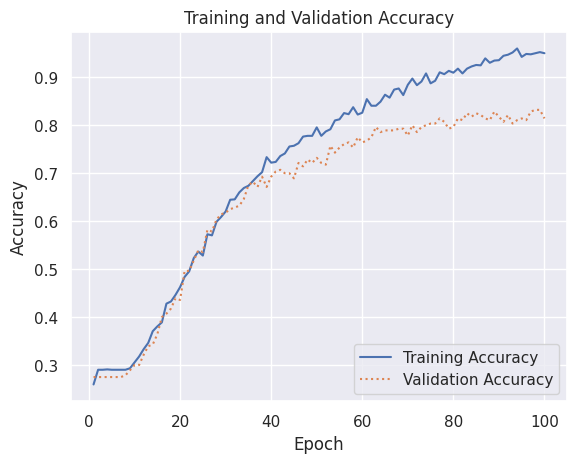

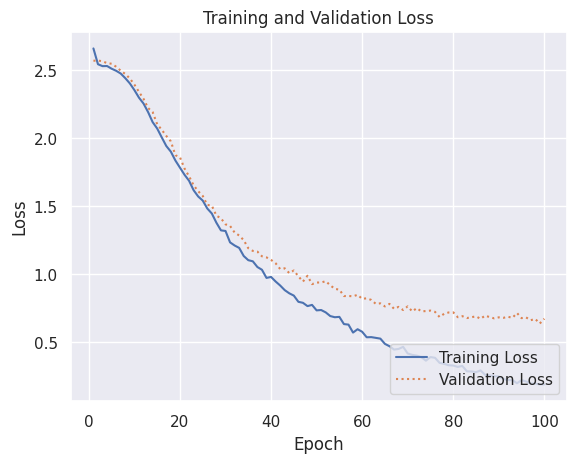

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label = 'Training Accuracy')
plt.plot(epochs, val_acc, ':', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.plot()
plt.figure()
plt.plot(epochs, loss, '-', label = 'Training Loss')
plt.plot(epochs, val_loss, ':', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'lower right')
plt.plot()

In [49]:
testing_data_Y2 = to_categorical(testing_data_Y2)
testing_data_X2 = testing_data_X2.reshape(testing_data_X2.shape[0],W2,H2,1)

In [52]:
# Measuring the time taken by the model to train
start_time2 = time.time()
history2 = model2.fit(training_data_X2,training_data_Y2,validation_data = (testing_data_X2, testing_data_Y2),batch_size = 150,epochs = 100)
end_time2 = time.time()


print("###### Total Time Taken: ", round((end_time2 - start_time2)/60), 'Minutes ######')

Epoch 1/100
9/9 [==============================] - 23s 2s/step - loss: 0.1612 - accuracy: 0.9640 - val_loss: 0.6110 - val_accuracy: 0.8256
Epoch 2/100
9/9 [==============================] - 19s 2s/step - loss: 0.1489 - accuracy: 0.9694 - val_loss: 0.5970 - val_accuracy: 0.8399
Epoch 3/100
9/9 [==============================] - 16s 2s/step - loss: 0.1290 - accuracy: 0.9732 - val_loss: 0.6138 - val_accuracy: 0.8505
Epoch 4/100
9/9 [==============================] - 13s 1s/step - loss: 0.1377 - accuracy: 0.9709 - val_loss: 0.6567 - val_accuracy: 0.8256
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 0.1230 - accuracy: 0.9732 - val_loss: 0.6108 - val_accuracy: 0.8221
Epoch 6/100
9/9 [==============================] - 13s 1s/step - loss: 0.1350 - accuracy: 0.9686 - val_loss: 0.6254 - val_accuracy: 0.8221
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 0.1250 - accuracy: 0.9709 - val_loss: 0.6019 - val_accuracy: 0.8505
Epoch 8/100
9/9 [==========

[]

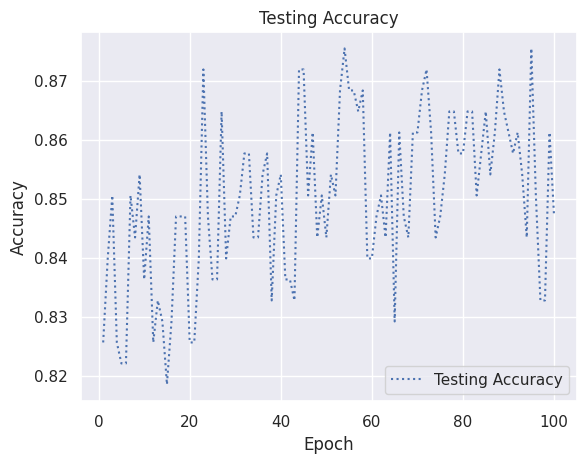

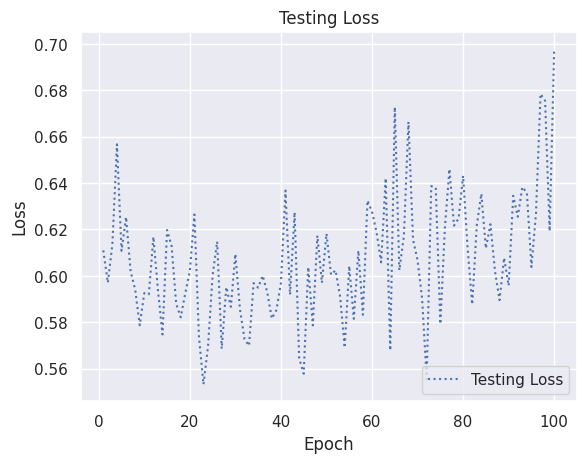

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

val_acc = history2.history['val_accuracy']
val_loss = history2.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, val_acc, ':', label = 'Testing Accuracy')
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.plot()
plt.figure()
plt.plot(epochs, val_loss, ':', label = 'Testing Loss')
plt.title('Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'lower right')
plt.plot()